In [8]:
import time
start = time.time()


In [9]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
%config InlineBackend.figure_format='retina'

def predictcon(predict_date):
    num_day=30

    predict_day=int(predict_date[8:])
    predict_month=int(predict_date[5:7])
    predict_year=int(predict_date[0:4])

    str(predict_year)+'_'+str(predict_month)+'_'+str(predict_day)

    daybefore=[]
    pmb=predict_month-1
    dayleft=num_day-predict_day

    if predict_day>num_day:
        day=predict_day-num_day
        while day<predict_day:
            daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(day).zfill(2))
            day+=1
    else:
        if pmb==1 or pmb==3 or pmb==5 or pmb==7 or pmb==8 or pmb==10 or pmb==12:
            for i in range(31-dayleft,32,1):
                daybefore.append(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(i).zfill(2))
            for i in range(1,predict_day,1):
                daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(i).zfill(2))
        elif pmb==4 or pmb==6 or pmb==9 or pmb==11:
            for i in range(30-dayleft,31,1):
                daybefore.append(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(i).zfill(2))
            for i in range(1,predict_day,1):
                daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(i).zfill(2))
        else:
            if predict_year%4==0:
                for i in range(29-dayleft,30,1):
                    daybefore.append(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(i).zfill(2))
                for i in range(1,predict_day,1):
                    daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(i).zfill(2))
            else:
                for i in range(28-dayleft,29,1):
                    daybefore.append(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(i).zfill(2))
                for i in range(1,predict_day,1):
                    daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(i).zfill(2))

    pathlist=[]
    for i in daybefore:
        pathlist.append('Energy_Balance_'+str(i))

    def clean(path):
        rawdata=pd.read_csv(path+".csv", delimiter=";" )
        deleteindex=rawdata.loc[rawdata.loc[pd.IndexSlice[:,'Battery discharging / Mean values [W] ']]==' '].index
        rawdata.drop(deleteindex,inplace=True)
        rawdata.rename(columns={' ':'Time'},inplace=True)
        rawdata['Time']=rawdata['Time'].str.replace('[^\d]','')
        rawdata['Time']=path[15:19]+path[20:22]+path[23:]+rawdata['Time']
        rawdata['Time']=pd.to_datetime(rawdata.Time)
        rawdata.set_index('Time', inplace=True)
        for i in rawdata.columns:
            if i != 'Direct consumption / Mean values [W] ' and i != 'Battery discharging / Mean values [W] ' and i!='External energy supply / Mean values [W] ' and i != 'PV power generation / Mean values [W]  ':
                rawdata.drop([i],axis=1,inplace=True)
        for i in rawdata.columns:
            rawdata[i].fillna('0',inplace=True)
            rawdata[i]=rawdata[i].apply(lambda x: x.replace(' ', '0'))
            rawdata[i]=rawdata[i].str.replace('\D','').astype(int)
        rawdata['Consumption']=rawdata['Direct consumption / Mean values [W] ']+rawdata['Battery discharging / Mean values [W] ']+rawdata['External energy supply / Mean values [W] ']
        rawdata.rename(columns={'PV power generation / Mean values [W]  ':'Generation'},inplace=True)
        rawdata.drop(['Direct consumption / Mean values [W] ', 'Battery discharging / Mean values [W] ','External energy supply / Mean values [W] '],axis=1,inplace=True)
        rawdata.drop(['Generation'],axis=1,inplace=True)
        return rawdata

    rawdata=[]

    for i in pathlist:
        df=clean(i)
        rawdata.append(df)


    data=rawdata[0]
    for i in range(num_day-1):
        data=pd.concat([data,rawdata[i+1]])


    for i in range(data.shape[0]):
        if data.iloc[i,0]==0:
            data.iloc[i,0]=data.iloc[i-96,0]

    fit4 = ExponentialSmoothing(data.Consumption, seasonal_periods=96, trend='add' ,seasonal='mul').fit()

    fit4.fittedvalues.plot(style='--', color='red')

    forecast=fit4.forecast(96)

    params=fit4.model.params
    Consumption=[]
    for i in forecast:
        Consumption.append(i)
    return Consumption


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


[2032.4402838600886,
 2016.6843734063004,
 1881.780869744863,
 1826.7238198624802,
 1833.7319492286204,
 1632.223941215471,
 1722.6853051383955,
 1629.2808659767152,
 1578.077991618267,
 1528.5899167490734,
 1375.0647014121564,
 1468.4574038461296,
 1424.5283185130868,
 1420.5703831050837,
 1459.5851379645096,
 1344.337554041933,
 1371.986560081622,
 1317.758791488792,
 1382.0638590390245,
 1742.0376543271109,
 1926.253102455807,
 2581.0086488600064,
 1894.622837976575,
 1431.1760727613,
 1318.8013343824302,
 1837.385578620758,
 1236.6392552668658,
 1177.2635778406266,
 1145.7044950889147,
 1181.3357377010955,
 1243.8476199660915,
 1179.3219340045898,
 1039.055123659118,
 1052.5491050616097,
 993.2890685836849,
 1045.5384241501893,
 1191.053060536177,
 1025.9942453913147,
 941.0431608729039,
 957.1275787659191,
 1212.154639827433,
 1267.9732138808022,
 1239.152122111539,
 1309.9811377730005,
 1226.6949148546144,
 1224.952346317566,
 1033.9432317977332,
 1008.494439490491,
 930.13009703

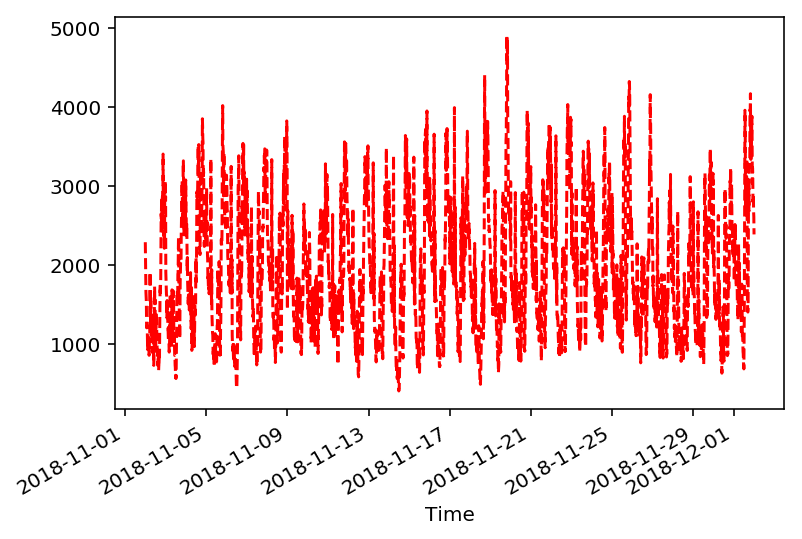

In [10]:
predictcon('2018_12_02')

In [11]:

end = time.time()
print(end - start)

142.27759289741516
